## Project 2. 

I picked the dataset that contains the legal basis for divorce in the 50 states of the USA (http://vlado.fmf.uni-lj.si/pub/networks/data/2mode/divorce.net). Divorce is the legal termination of a marriage. The nine legal bases are: incompatability, cruelty, desertion, nonsupport, alcohol, felony, impotence, insanity, and separation. The network is a bipartite graph consisting of the 50 states in the USA and the nine legal bases for divorce. Each state has edges to the bases allowed for legal divorce.

In [97]:
#import libraries
import pandas as pd
from pandas.compat import StringIO
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import re

#import data from dat file using StringIO library

temp=u"""
1 1 1 1 1 1 1 1 1
1 1 1 0 1 1 1 1 0
1 0 0 0 0 0 0 0 0
0 1 1 1 1 1 1 1 1
1 0 0 0 0 0 0 1 0
1 0 0 0 0 0 0 0 0
1 1 1 1 1 1 0 1 1
1 0 0 0 0 0 0 0 1
1 0 0 0 0 0 0 1 0
1 1 1 0 1 1 1 1 0
1 0 0 0 0 0 0 0 1
1 1 1 1 1 1 0 1 1
0 1 1 0 1 1 1 0 0
1 0 0 0 0 1 1 1 0
1 0 0 0 0 0 0 0 0
1 1 1 0 1 1 1 1 0
1 0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0 1
1 1 1 1 1 0 1 1 0
0 1 1 0 0 1 1 1 1
1 1 1 1 1 1 1 0 1
1 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0
1 1 1 0 1 1 1 1 0
1 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 1 1
1 1 1 1 1 1 1 0 0
0 1 1 0 1 1 0 1 1
1 1 1 0 0 0 0 0 0
0 1 1 0 0 1 0 0 1
0 0 0 0 0 0 1 1 1
1 1 1 1 1 1 1 1 0
1 1 1 0 1 1 1 0 1
1 1 1 1 1 1 1 1 0
1 0 0 0 0 0 0 0 0
0 1 1 0 0 1 1 1 0
1 1 1 1 1 1 1 0 1
0 1 1 0 1 0 0 0 1
0 1 1 1 1 1 0 0 0
1 1 1 1 1 1 1 0 0
1 1 1 0 0 1 0 1 1
0 1 1 1 1 1 1 1 0
0 1 1 1 0 1 0 1 1
0 1 0 0 0 1 0 0 1
1 0 0 0 0 0 0 0 1
1 1 1 0 1 1 0 1 1
1 0 0 0 0 0 0 0 1
1 0 0 0 0 0 0 1 1"""

states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New.Hampshire","New.Jersey","New.Mexico","New.York","North.Carolina","North.Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode.Island","South.Carolina","South.Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West.Virginia","Wisconsin","Wyoming"]
legal_bases  = ["incompat","cruelty","desertn","nonsupp","alcohol","felony","impotenc","insanity","separate"] 

#reads data to pandas data frame
df = pd.read_csv(StringIO(temp), 
                 sep = "\s+", 
                 names = legal_bases)


df.set_index(pd.Index(states),inplace = True)

In [98]:
#build weighted graph where nodes represent states 

states_common_bases_list=[]

for legal_base in list(df.columns):
    #finds out event's participant
    states_common_bases =list(df[df.loc[:,legal_base]==1].index)
    #stores lists of participants for each event
    states_common_bases_list.append(participant)

#finds all combinations of two participants
from itertools import combinations 
  
states_common_bases_pairs_list=[]
for states_set in states_common_bases_list: 
    states_pairs = list(combinations(states_set, 2))
    states_common_bases_pairs_list+=friends_pairs

#stores graph edges
friends = pd.DataFrame(friends_pairs_list,columns=['state 1','state 2'])
friends.head(10)

,state 1,state 2
0,Alabama,Alaska
1,Alabama,Arizona
2,Alabama,California
3,Alabama,Colorado
4,Alabama,Connecticut
5,Alabama,Delaware
6,Alabama,Florida
7,Alabama,Georgia
8,Alabama,Hawaii
9,Alabama,Idaho


In [99]:
#calculates edges weights
weights = friends.groupby(['state 1','state 2']).size().reset_index()
weights.columns = ['state 1','state 2','weight']

weights.sort_values('weight', ascending=False).head(15)

,state 1,state 2,weight
704,Massachusetts,Rhode.Island,8
2,Alabama,Arkansas,8
32,Alabama,North.Dakota,8
5,Alabama,Connecticut,8
34,Alabama,Oklahoma,8
243,Connecticut,Idaho,8
10,Alabama,Idaho,8
936,North.Dakota,Oklahoma,8
19,Alabama,Massachusetts,8
37,Alabama,Rhode.Island,8


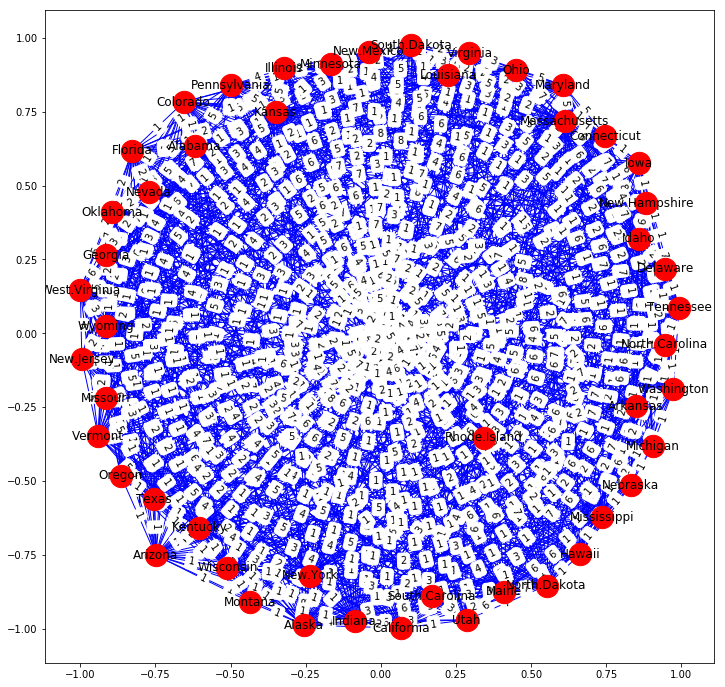

In [100]:
#creates empty graph
G = nx.Graph()

#adds nodes with the node attribute "bipartite"
G.add_nodes_from(states)

edges = weights[['state 1','state 2','weight']].values.tolist()
#adds edges
i=0
for item in edges:
    G.add_edge(item[0],item[1],weight=item[2])

#select layout
pos = nx.spring_layout(G,k=10)

#adjust size of th graph
plt.figure(figsize = (12,12))

#pos=nx.get_node_attributes(G,'pos')      
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = 'r', node_size = 500)

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='b', arrows=True)

nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

#display graph
plt.show()

In [101]:
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,weight=edata)
    return g2

def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [102]:
islands=island_method(G)
for i in islands:
# print the threshold level, size of the graph, and number of connected components
  print (i[0], len(i[1]),len(list(nx.connected_component_subgraphs(i[1]))))

1 40 1
2 33 1
3 28 1
4 25 1
5 22 1
6 18 1
7 8 1
